<center> <h2> DS 3000 - Summer 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Predicting NBA Player Efficiency Rating </h3> </center>
<center><h4>Nickhil Tekwani and Esha Aggarwal</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



In [60]:
# TODO from FP3

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

**Problem Statement**

Scouting and recruiting players in the NBA has always been an intricate process that is constantly changing and improving, but has ultimately always relied on coaches, agents, and scouts to predict whether a player will be of value just by watching them play. What if there is a more objective method of doing so? Although it is impossible to replicate the experience and subjectivity of the human brain, the problem that will be addressed in this project is utilizing quantitative player data, such as certain statistics and demographics, to evaluate player efficiency in the NBA. This project will also lead to insights about how a random assortment of demographics will do in the NBA.


**Significance of the Problem**

This is a significant problem because insights drawn from this project can help drive better choices in choosing players, such as in pointing scouts towards talent they may not have recognized before or just confirming/denying their thoughts on a recruit’s potential success in the NBA. Currently, there is no publicly available tool to make these predictions and it can be extremely useful for sports professionals, as well as fans placing bets on their favorite players. Moreover, this tool could also aid coaches and team administrators in predicting future performance and allow for changes to the team strategy based on these predictions. 


**Questions/Hypothesis**

    1) What is the ideal body type for a successful NBA player?
        H0 = there is no ideal body type for the NBA
        H1 = players that are tall with a higher weight will be more successful
    
    2) Does player efficiency increase or decrease with the number of years played? 
        H0 = the number of years played will not affect player efficiency
        H1 = the number of years played will impact efficiency 
    
    3) Is it possible that height and weight have an effect on position and thus their overall efficiency?
        H0 = height and weight will have no effect on position and thus efficiency
        H1 = height and weight will have an impact on position and thus efficiency

We hypothesize that a predictive model can be created to accurately predict an NBA player’s efficiency rating based on position, height, weight, and number of years played. Specifically, none of the demographics are part of the statistics used to calculate efficiency rating.


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

The dataset used in this project was acquired on Kaggle.com and is the best suited publicly available data for our goals. (link: https://www.kaggle.com/drgilermo/nba-players-stats?select=Seasons_Stats.csv)

This dataset provides player information spanning 67 seasons, beginning in 1950 up until 2017. There are three csv files given (season stats, players, and player data). In order to obtain all of the data we needed to construct the model, we merged the player data dataframe with the season stats dataframe on the player name and year started. 

The information given in these datasets is quite extensive and is mostly quantitative. The season stats dataframe contains the following columns: 
* Player: player’s full name
* Year: season year
* Pos: position played 
* Age: player age
* Tm: team the player in on 
* G: number of games played
* Gs: number of games started
* Mp: minutes played total
* PER: player efficiency rating
* ts%, 3par, ft3, orb%, drb%, trb%, ast%, stl%, blk%, tov%, usg%, ows, dws, ws, ws/48, obpm, dbpm, bpm, vorp, fg, fga, fg%, 3p, 3pa, 2p, 2pa, 2p%, efg%, ft, fta, ft%, orb, drb, trb, ast, stl, blk, tov, pf, pts: player performance stats used to calculate the player efficiency rating 

The player data dataframe contains the following columns: 
* Name: player’s full name
* Year_start: first year in the NBA
* Year_end: last year in the NBA
* Position: position played
* Height: height in cm
* Weight: weight in kg
* Birth_date: day and year player was born 
* College: school the player attended


### 2.2. Variables
**Independent Variables(feature variables):**
* Year_start
* Height
* Weight
* Pos
* Age
* Team

**Dependent Variable(target variable):**
* PER(player efficiency rating)

The independent variables are the features that are listed above. Using feature engineering, we categorized the player team in order to construct the model. The dependent variable, or our target variable, is a numerical value that will be used in our model.


### 2.3. Data Analysis
**Predictive Model:**

Given a variety of information about a player(height, weight, position, age, team), we will be predicting that players’ efficiency rating. 

**Supervised Machine Learning:**

This is a supervised machine learning problem because the target value, or the player efficiency rating, is predicted from labeled data. The subcategory of this task is regression as the target value is numerical and continuous. 

**ML Algorithms:**

The following machine learning algorithms were used in this project:
* Linear Regression: Finds the equation that describes the best fitting line for the data
* Ridge: Regularized linear regression that restricts coefficients in order to minimize the model complexity
* Lasso: An alternative to ridge
* KNN (k-Nearest Neighbor): Finds the average of the k closest data points. 
* SVM (Support Vector Machine): Finds and uses the line that maximizes the margin between the line and nearest data points. It is fast and scales well to large datasets. 



<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


#### Clean Data

In [1]:
# read csvs and import pandas
import pandas as pd
player_data = pd.read_csv('data/player_data.csv')
players = pd.read_csv('data/players.csv')
season_stats = pd.read_csv('data/Seasons_Stats.csv')

In [2]:
# checking where duplicate player names exist (should only exist in player_data and players)
pd_dupe = player_data.pivot_table(index=['name'], aggfunc='size')
p_dupe = players.pivot_table(index=['Player'], aggfunc='size')
ss_dupe = season_stats.pivot_table(index=['Player'], aggfunc='size')
print("Duplicate names in PLAYER_DATA = \n", pd_dupe)
print("\n \n Duplicate names in PLAYERS = \n", p_dupe)
print("\n \n Duplicate names in SEASON_STATS = \n", ss_dupe)
# based on this, it makes more sense to use player_data since it has more players 
# it also has more relevant information to what we need

Duplicate names in PLAYER_DATA = 
 name
A.C. Green            1
A.J. Bramlett         1
A.J. English          1
A.J. Guyton           1
A.J. Hammons          1
                     ..
Zendon Hamilton       1
Zhou Qi               1
Zoran Dragic          1
Zoran Planinic        1
Zydrunas Ilgauskas    1
Length: 4500, dtype: int64

 
 Duplicate names in PLAYERS = 
 Player
A.C. Green            1
A.J. Bramlett         1
A.J. English          1
A.J. Guyton           1
A.J. Hammons          1
                     ..
Zelmo Beaty*          1
Zendon Hamilton       1
Zoran Dragic          1
Zoran Planinic        1
Zydrunas Ilgauskas    1
Length: 3921, dtype: int64

 
 Duplicate names in SEASON_STATS = 
 Player
A.C. Green            18
A.J. Bramlett          1
A.J. English           2
A.J. Guyton            3
A.J. Hammons           1
                      ..
Zelmo Beaty*           8
Zendon Hamilton        8
Zoran Dragic           3
Zoran Planinic         3
Zydrunas Ilgauskas    13
Length: 3921, 

In [3]:
# HELPER FUNCTIONS
# function for converting height in "feet-inches" to inches
def height_to_inches(h):
    height = h.split('-')
    feet = int(height[0])
    inches = int(height[1])
    total = (feet*12) + inches
    return total
# function for converting height in inches to cm
def inches_to_cm(i):
    return i * 2.54
# function for converting weight in lbs to kgs
def lbs_to_kgs(l):
    return l * 0.453592


In [4]:
# DATA CLEANING FUNCTION
def clean_data():
    # CLEAN SEASON STATS
    # drop rows in season stats where PER = NaN
    has_per_ss = season_stats[season_stats['PER'].notna()]
    # drop columns from season stats that we dont need
    useful_columns = ['Year', 'Player', 'Pos', 'Age', 'Tm', 'PER']
    only_useful_ss = has_per_ss[useful_columns]
    # strip asterisks
    no_star = only_useful_ss.replace('\*','',regex=True)
    final_cleaned_ss = no_star

    # CLEAN PLAYER DATA
    # strip asterisks
    no_player_star = player_data.replace('\*','',regex=True)
    # drop columns from player data that we dont need
    useful_pd_col = ["name", "year_start", "height", "weight", "college"]
    final_cleaned_pd = no_player_star[useful_pd_col]

    # MERGE
    merged_data = final_cleaned_pd.merge(final_cleaned_ss, left_on=['name', 'year_start'], right_on=["Player", "Year"])
    # drop duplicates (duplicate if name AND year_start are the same) but keep first instance (their rookie year)
    merged_drop_dupes = merged_data.drop_duplicates(["name", "year_start"], keep="first")
    # drop Year and Player columns
    dropYP = merged_drop_dupes.drop(labels=['Year', 'Player'], axis=1)
    # lower case all column names
    dropYP.columns = map(str.lower, dropYP.columns)
    # change name of team column
    dropYP["team"] = dropYP["tm"]
    # drop old tm column
    new_merged = dropYP.drop(labels=["tm"], axis=1)
    
    # CONVERT HEIGHT TO CM
    temp_1 = new_merged["height"].apply(height_to_inches)
    temp_2 = temp_1.apply(inches_to_cm)
    new_merged["height"] = temp_2
    # CONVERT WEIGHT TO KGs
    temp_3 = new_merged["weight"].apply(lbs_to_kgs)
    new_merged["weight"] = temp_3
    
    # drop all NA and return df
    drop_na_df = new_merged.dropna(axis=0)
    
    # drop college 
    result = drop_na_df.drop(["college"], axis=1)
    
    result.reset_index(drop=True, inplace=True)
    return result

In [5]:
# store in variable
cleaned_nba_df = clean_data()
cleaned_nba_df

,name,year_start,height,weight,pos,age,per,team
0,Alaa Abdelnaby,1991,208.28,108.862080,PF,22.0,13.1,POR
1,Zaid Abdul-Aziz,1969,205.74,106.594120,C,22.0,12.3,TOT
2,Kareem Abdul-Jabbar,1970,218.44,102.058200,C,22.0,22.5,MIL
3,Mahmoud Abdul-Rauf,1991,185.42,73.481904,PG,21.0,12.2,DEN
4,Tariq Abdul-Wahad,1998,198.12,101.151016,SG,23.0,10.1,SAC
...,...,...,...,...,...,...,...,...
3305,George Zidek,1996,213.36,113.398000,C,22.0,8.0,CHH
3306,Derrick Zimmerman,2006,190.50,88.450440,PG,24.0,5.5,NJN
3307,Stephen Zimmerman,2017,213.36,108.862080,C,20.0,7.3,ORL
3308,Jim Zoet,1983,215.90,108.862080,C,29.0,-0.8,DET


#### Extracting New Features
In the NBA, teams are grouped into the East and West Conference, so we think might provide more insight than just looking at the 60 historical teams individually. Also, there are only 30 currently active teams, so not all would be relevant to a future NBA scout, but conference will always be relevant even if new teams are created or old ones are removed.

In [6]:
# array of all the unqiue teams in dataframe
teams = cleaned_nba_df["team"].unique()
# TOT means that the player played for multiple teams in their rookie year
other = ('TOT')
west_teams = ('POR', 'DEN', 'SAC', 'VAN', 'LAL', 'SDR', 'PHO','DAL', 'MEM', 'OKC', 'GSW', 'MIA', 'SAS', 'SFW', 'MIN',
             'SEA', 'UTA', 'LAC', 'SDC', 'NOK', 'FTW', 'HOU', 'MNL', 'KCO', 'MLH', 'CHP', 'NOH', 'CHZ', 'NOP', 'INO')
east_teams = ('MIL', 'SYR', 'DET', 'NYK', 'BOS', 'TOR', 'NJN', 'PHI', 'CLE', 'CHA', 'ORL', 'CIN', 'STL', 'CHI', 'PHW',
             'BLB', 'ATL', 'WSB', 'WAS', 'CHH', 'IND', 'KCK', 'NOJ', 'BRK', 'ROC', 'BUF', 'CHO', 'CAP', 'BAL')

# returns conference based on above lists
def get_conference(c):
    if(c in other):
        return "N/A"
    if(c in west_teams):
        return "West"
    if(c in east_teams):
        return "East"

In [7]:
# DATA WRANGLING FUNCTION
def wrangle_data():
    team_col = cleaned_nba_df["team"]
    new_col = team_col.apply(get_conference)
    cleaned_nba_df["conf"] = new_col
    return cleaned_nba_df

In [8]:
nba_df = wrangle_data()
nba_df

,name,year_start,height,weight,pos,age,per,team,conf
0,Alaa Abdelnaby,1991,208.28,108.862080,PF,22.0,13.1,POR,West
1,Zaid Abdul-Aziz,1969,205.74,106.594120,C,22.0,12.3,TOT,N/A
2,Kareem Abdul-Jabbar,1970,218.44,102.058200,C,22.0,22.5,MIL,East
3,Mahmoud Abdul-Rauf,1991,185.42,73.481904,PG,21.0,12.2,DEN,West
4,Tariq Abdul-Wahad,1998,198.12,101.151016,SG,23.0,10.1,SAC,West
...,...,...,...,...,...,...,...,...,...
3305,George Zidek,1996,213.36,113.398000,C,22.0,8.0,CHH,East
3306,Derrick Zimmerman,2006,190.50,88.450440,PG,24.0,5.5,NJN,East
3307,Stephen Zimmerman,2017,213.36,108.862080,C,20.0,7.3,ORL,East
3308,Jim Zoet,1983,215.90,108.862080,C,29.0,-0.8,DET,East


#### One Hot

In [9]:
# IMPORTS
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [10]:
# ONE HOT

encoder = OneHotEncoder(sparse = False)
cat_features = nba_df.drop(["name", "year_start", "height", "weight", "age", "per"], axis=1)
encoded_df = encoder.fit_transform(cat_features)

cat_features_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names())

num_features = nba_df.drop(["name", "year_start", "pos", "team", "per", "conf"], axis=1)

features = cat_features_df.merge(num_features, left_index=True, right_index=True)
target = nba_df["per"]

#### Split Train Test

In [11]:
# split data into training and testing sets
def split_train_test(f, t):
    splits = train_test_split(f, t, random_state=3000)
    return splits

In [12]:
X_train, X_test, y_train, y_test = split_train_test(features, target)

#### MinMaxScaler

In [13]:
# preprocess using MinMaxScaler
def preprocessor(train, test):
    scaler = MinMaxScaler().fit(train)
    
    #scale testing and training sets
    X_train_scaled = scaler.transform(train)
    X_test_scaled = scaler.transform(test)

    return X_train_scaled, X_test_scaled

In [14]:
X_train_scaled, X_test_scaled = preprocessor(X_train, X_test)

#### RFE

In [15]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

def RFE_feature_selection(features, x_train, x_test, ytrain):
    #instantiate
    feature_selection = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)
    #fit scaled and y train
    feature_selection.fit(x_train, ytrain)
    #transform previous scaled sets to only select 3 most important features in each
    X_train_selected = feature_selection.transform(x_train)
    X_test_selected = feature_selection.transform(x_test)
    
    #determine selected features
    selected_features = [feature for feature, status in zip(features, feature_selection.get_support()) if status == True]
    print('Selected NBA features:')
    for feature in selected_features:
        print('\t' + feature)

    return X_train_selected, X_test_selected, selected_features



In [16]:
X_train_selected, X_test_selected, selected_features = RFE_feature_selection(features, X_train_scaled, X_test_scaled, y_train)

Selected NBA features:
	height
	weight
	age


### 3.2. Data Exploration
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook)


First, we decided to look at general info on our dataframe

In [17]:
# DF INFO
nba_df.info()
# PRIMARY KEY = name, year_start
# NUMERICAL FEATURES = height, weight, age
# CATEGORICAL FEATURES = college, pos, team, conf
# TARGET FEATURE = per

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 9 columns):
name          3310 non-null object
year_start    3310 non-null int64
height        3310 non-null float64
weight        3310 non-null float64
pos           3310 non-null object
age           3310 non-null float64
per           3310 non-null float64
team          3310 non-null object
conf          3310 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 232.9+ KB


Then we created a function to descrive our data and used it to describe the data grouped by conference in regards to PER.

In [18]:
def describe_data(data, IV, DV):
    return data.groupby(IV).agg(["count", "mean", "std", "sem"])[DV]

In [106]:
exploratory_desc = describe_data(nba_df, "conf", "per")
exploratory_desc

,count,mean,std,sem
conf,,,,
East,1633,10.549969,6.678398,0.165264
N/A,222,9.311261,5.114119,0.343237
West,1455,10.966254,7.012340,0.183836


To look more at our numerical features (height, weight, and age), we looked at their 5 number summaries

In [19]:
import numpy as np
height = nba_df["height"]
weight = nba_df["weight"]
age = nba_df["age"]
# 5 NUMBER SUMMARY ON NUMERICAL FEATURES
print("HEIGHT:")
print("\t min = ", np.min(height))
print("\t max = ", np.max(height))
print("\t std = ", np.std(height))
print("\t mean = ", np.mean(height))
print("\t median = ", np.median(height))

print("WEIGHT:")
print("\t min = ", np.min(weight))
print("\t max = ", np.max(weight))
print("\t std = ", np.std(weight))
print("\t mean = ", np.mean(weight))
print("\t median = ", np.median(weight))

print("AGE:")
print("\t min = ", np.min(age))
print("\t max = ", np.max(age))
print("\t std = ", np.std(age))
print("\t mean = ", np.mean(age))
print("\t median = ", np.median(age))

HEIGHT:
	 min =  160.02
	 max =  231.14000000000001
	 std =  8.817436827370468
	 mean =  198.78914803625247
	 median =  198.12
WEIGHT:
	 min =  60.327736
	 max =  163.29312
	 std =  11.65877551405125
	 mean =  95.54963442900275
	 median =  95.25431999999999
AGE:
	 min =  19.0
	 max =  30.0
	 std =  1.6089564581037186
	 mean =  22.76858006042296
	 median =  23.0


### Visualizations

#### Boxplots

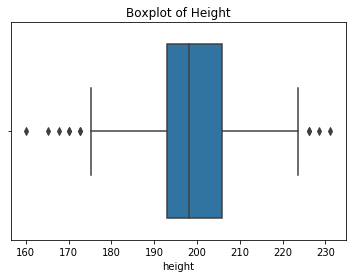

In [114]:
import seaborn as sns

hx = sns.boxplot(data=nba_df, x="height").set_title("Boxplot of Height")

From this boxplot of the height, we can see how many outliers there are and how big the range in the heights are. Though daunting, it shows us that we have solid height data to work with moving forward

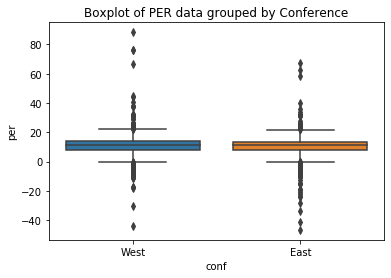

In [115]:
ax = sns.boxplot(x="conf", y="per", data=nba_df,
                 order=["West", "East"]).set_title("Boxplot of PER data grouped by Conference")

Comparing west and east conferences mostly showed us that the center of the data is relatively the same between the PER's between the conferences. However, we see the highest PER's being achieved by the west and the lowest being achieved by the east. This is something we could take a look at again later.

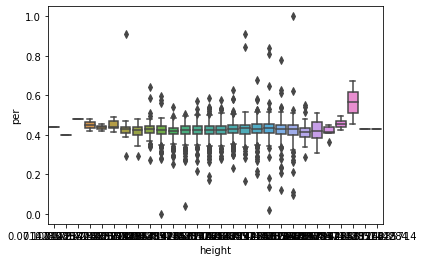

In [96]:
bx = sns.boxplot(x="height", y="per", data=nba_df_scaled)

This boxplot served to be an interesting way to look at how the PER's avg at different heights. As you move further to the right and achieve a greater height, you see the mean of the data spike up. You also see the mean on the lower end be higher up, with the greatest variability coming in the upper/middle part of the height range. 

#### Conference vs. PER (Bar Chart)

In [64]:
import plotly.io as pio

aggs = ["count","sum","avg","median","mode","rms","stddev","min","max","first","last"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)


data = [dict(
  type = 'bar',
  x = nba_df["team"],
  y = nba_df["per"],
  mode = 'markers',
  transforms = [dict(
    type = 'aggregate',
    groups = nba_df["team"],
    aggregations = [dict(
        target = 'y', func = 'median', enabled = True)
    ]
  )]
)]

layout = dict(
  title = 'Player Efficiency Rating by Team',
  xaxis = dict(title = 'Team'),
  yaxis = dict(title = 'Rating', range = [0,22]),
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

This bar graph looks at the average player efficiency rating for each team. It gives us an insight into which teams are more likely to have better rookies. For example, the Brooklyn Nets (BRK) have the highest player efficiency rating average across all their rookies, so we think they might end up with some of the strongest rookie players. This is valuable information for incoming rookies into the NBA!

#### Height vs. PER (Scatterplot)

In [116]:
# Scale the Data so the results aren't skewed.
temp_nba_df = nba_df.drop(["name", "year_start", "pos", "team", "conf"], axis=1)
temp_col = ['height', 'weight', 'age', 'per']

scaler = MinMaxScaler().fit(temp_nba_df)
array_scaled = scaler.transform(temp_nba_df)

nba_df_scaled = pd.DataFrame(array_scaled, columns = temp_col)

In [89]:
import plotly.express as px

fig = px.scatter(nba_df_scaled, x="height", y="weight", title="Relationship between Player Height and Weight")
fig.show()

In this scatterplot, we can clearly see the relationship between the players height and their weight. There is a positive correlation between height and weight because if we to draw a line of best fit through the points, both the x and y coordinates would be increasing linearly. In other words, the taller the player, the more they weight -- which is exactly what we wanted to check with this curiosity question. It's interesting to see some of the outliers who are super tall but don't weight that much

In [ ]:
# TODO insert visualizations as images

### 3.3. Model Construction

#### Hypothesis Testing

##### function definitions

In [39]:
#this section is to test if CONFERENCE is significant 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random 

all_values = []
def run_a_test(score_metric):
    for x in range(10):
        rand = random.randint(0,3000)
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=rand)
        # scale
        X_train_scaled, X_test_scaled = preprocessor(X_train, X_test)
        # rfe selection
        # X_train_selected, X_test_selected, selected_features = RFE_feature_selection(features, X_train_scaled, X_test_scaled, y_train)
        # model
        model = KNeighborsRegressor().fit(X=X_train_scaled, y=y_train)
        score = score_metric(y_test, model.predict(X_test_scaled))
        all_values.append(score)
    return all_values

new_features = features.drop(['x2_East', 'x2_N/A', 'x2_West'], axis=1)
no_conf_values = []
def run_conf_test(score_metric):
    for x in range(10):
        rand = random.randint(0,3000)
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(new_features, target, random_state=rand)
        # scale
        X_train_scaled, X_test_scaled = preprocessor(X_train, X_test)
        # rfe selection
        # X_train_selected, X_test_selected, selected_features = RFE_feature_selection(new_features, X_train_scaled, X_test_scaled, y_train)
        # model
        model = KNeighborsRegressor().fit(X=X_train_scaled, y=y_train)
        score = score_metric(y_test, model.predict(X_test_scaled))
        no_conf_values.append(score)
    return no_conf_values

##### MSE

In [40]:
run_a_test(mean_squared_error)
run_conf_test(mean_squared_error)

[62.661230917874406,
 48.80186714975845,
 53.3055768115942,
 52.63752608695652,
 53.13208260869565,
 53.14755603864734,
 40.57270289855073,
 47.601099033816425,
 59.70451594202899,
 49.17936859903382]

In [32]:
import numpy as np
av = 'all_values'
ncv = 'no_conf_values'
av_list = [av, av, av, av, av, av, av, av, av, av]
ncv_list = [ncv, ncv, ncv, ncv, ncv, ncv, ncv, ncv, ncv, ncv]
combined_list = av_list + ncv_list

combined_val_list = all_values + no_conf_values

combined_dict = {'Which Subset': combined_list, 'Values': combined_val_list}
anova_temp_df = pd.DataFrame(data=combined_dict)
anova_temp_df["Values"] = anova_temp_df["Values"].abs()
anova_temp_df

,Which Subset,Values
0,all_values,64.101156
1,all_values,49.375985
2,all_values,41.525241
3,all_values,44.307171
4,all_values,58.010223
5,all_values,44.722434
6,all_values,62.153425
7,all_values,56.592207
8,all_values,48.653192
9,all_values,64.719317


In [33]:
import statistics
avg_score_of_all = statistics.mean(all_values)
avg_score_of_no_conf = statistics.mean(no_conf_values)
print("Average score of All: ", avg_score_of_all)
print("Average score of No Conf: ", avg_score_of_no_conf)

Average score of All:  53.41603507246377
Average score of No Conf:  49.3581231884058


In [34]:
temp_desc = describe_data(anova_temp_df, "Which Subset", "Values")

In [37]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

# ANOVA function
def oneway_ANOVA(data, IV, DV):
    # get data by group
    all_val = data[data[IV] == "all_values"][DV] # explicit
    no_conf = data[data[IV] == "no_conf_values"][DV] # dynamic
    # print(all_val)
    # print(no_conf)
    
    # f one way
    tuple = stats.f_oneway(all_val, no_conf)
    global fstat
    global pval
    fstat = round(tuple[0], 2)
    pval = round(tuple[1], 4)
    
    # levene
    global levene
    levene = stats.levene(all_val, no_conf)
    # shapiro
    sExplicit = stats.shapiro(all_val)
    sDynamic = stats.shapiro(no_conf)
    
    global df1
    global df2
    df1 = len(temp_desc) - 1
    df2 = (len(all_values) - 1) + (len(no_conf_values) - 1) 
    mc = MultiComparison(data[DV], data[IV])
    tukey_result = mc.tukeyhsd()
    
    # constants
    dashes = "-----------------------"
    dashesShort = "-------------"
    #title
    title = dashes + "\n ONE-WAY ANOVA RESULTS \n" + dashes + "\n \n"
    # f test
    fbody = "\n F(" + str(df1) + "," + str(df2) + ") = " + str(fstat) + ", p = " + str(pval)
    ftest = "F-test \n" + dashesShort + fbody + "\n \n"
    # assumption checks
    assumpE = "\n Assumption of Equality of Variances: \n \t" + str(levene) + "\n \t \t" + check_assump(levene[1], .05)
    
    nDynamic = " No Conf Features : " + str(sDynamic) + "\n \t \t" + check_assump(sDynamic[1], .05)
    nExplicit = "\n \n \t All Features : " + str(sExplicit) + "\n \t \t" + check_assump(sExplicit[1], .05)
    
    assumpN = "\n \n Assumption of Normality: \n \t" + nDynamic + nExplicit
    
    assump = "Assumption Checks \n" + dashesShort + assumpE + assumpN + "\n \n"
    #post hoc
    posthoc = "Post-hoc Tests \n" + dashesShort + "\n" + "\n \n" + str(tukey_result)
    # "post hoc was running into errors"
        
    
    # compile all parts
    final = title + ftest + assump + posthoc 
    print(final)
    
    
def check_assump(p_actual, p_compare):
    if(p_actual <= p_compare):
        return "Assumption is violated. p <= .05"
    elif(p_actual > p_compare):
        return "Assumption is met. p > .05"

In [38]:
# run ANOVA to test the null hypothesis that conference has an impact on PER
oneway_ANOVA(anova_temp_df, "Which Subset", "Values")

-----------------------
 ONE-WAY ANOVA RESULTS 
-----------------------
 
F-test 
-------------
 F(1,18) = 1.25, p = 0.2774
 
Assumption Checks 
-------------
 Assumption of Equality of Variances: 
 	LeveneResult(statistic=2.0321031203277258, pvalue=0.17111871713537954)
 	 	Assumption is met. p > .05
 
 Assumption of Normality: 
 	 No Conf Features : (0.886997401714325, 0.15683360397815704)
 	 	Assumption is met. p > .05
 
 	 All Features : (0.9073649644851685, 0.2633771598339081)
 	 	Assumption is met. p > .05
 
Post-hoc Tests 
-------------

 
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
all_values no_conf_values  -4.0579 0.2774 -11.6685 3.5527  False
----------------------------------------------------------------


All assumptions are met, so we fail to reject the null hypothesis that conference has no significant impact on PER.
This also makes sense looking at the avg_score_of_all vs. avg_score_of_no_conf, as these two scores are roughly the same. 

### Non Parametric Hypotheses Tests
Kruskal-Wallis test is not vert sensitive to deviations from normality. From our data exploration, both of these have showed that they are not normal.

##### Kruskal for Height Hypothesis

In [125]:
from scipy import stats

per_height = stats.kruskal(nba_df["per"].values, nba_df["height"].values)
print(per_height)

KruskalResult(statistic=4968.705661330644, pvalue=0.0)


#### Kruskal for Weight Hypothesis

In [124]:
per_weight = stats.kruskal(nba_df["per"].values, nba_df["weight"].values)
print(per_weight)

KruskalResult(statistic=4963.67280638463, pvalue=0.0)


#### Applying ML Algorithims

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR


estimators = {"Linear Regression": LinearRegression(),
              "Ridge": Ridge(), 
              "Lasso": Lasso(),
              "k-Nearest Neighbor": KNeighborsRegressor(), 
              "Support Vector Machine": LinearSVR() 
             }



#### R2 Score

In [48]:
from sklearn.metrics import r2_score

def regressors_percentage_split():
    for name, clf in estimators.items():
        model = clf.fit(X=X_train_selected, y=y_train)
        r_train = r2_score(y_train, model.predict(X_train_selected))
        r_test = r2_score(y_test, model.predict(X_test_selected))
        
        print(name + ": \n \t R-squared value for training set: " + str(r_train)
              + "\n \t R-squared value for testing set: " + str(r_test) + "\n")

In [49]:
regressors_percentage_split()

Linear Regression: 
 	 R-squared value for training set: 0.01669218787565996
 	 R-squared value for testing set: 0.001717384927538479

Ridge: 
 	 R-squared value for training set: 0.016686788716004153
 	 R-squared value for testing set: 0.0020097612760966443

Lasso: 
 	 R-squared value for training set: 0.0
 	 R-squared value for testing set: -0.003645828055208966

k-Nearest Neighbor: 
 	 R-squared value for training set: 0.2048039548760947
 	 R-squared value for testing set: -0.22262110610565355

Support Vector Machine: 
 	 R-squared value for training set: 0.011936531824832008
 	 R-squared value for testing set: 0.006511018662581192



#### Mean Squared Error

In [126]:
def regressors_percentage_split_mse():
    for name, clf in estimators.items():
        model = clf.fit(X=X_train_selected, y=y_train)
        m_train = mean_squared_error(y_train, model.predict(X_train_selected))
        m_test = mean_squared_error(y_test, model.predict(X_test_selected))
        
        print(name + ": \n \t R-MSE value for training set: " + str(m_train)
              + "\n \t R-MSE value for testing set: " + str(m_test) + "\n")

In [127]:
regressors_percentage_split_mse()

Linear Regression: 
 	 R-MSE value for training set: 46.95739183091751
 	 R-MSE value for testing set: 38.59524990002537

Ridge: 
 	 R-MSE value for training set: 46.95764966519116
 	 R-MSE value for testing set: 38.583946148896096

Lasso: 
 	 R-MSE value for training set: 47.754519237949175
 	 R-MSE value for testing set: 38.80260054623609

k-Nearest Neighbor: 
 	 R-MSE value for training set: 37.974204834810635
 	 R-MSE value for testing set: 47.268545410628015

Support Vector Machine: 
 	 R-MSE value for training set: 47.20524126734907
 	 R-MSE value for testing set: 38.4103635212233



### 3.4. Model Evaluation

<u> R-Squared </u >

**Which Model Performed Best?**
k-Nearest Neighbor Regression resulted in the highest predictions accuracies for our data. It achieved an R-squared value on the training set of 0.205, and an R-squared value on the testing set of -0.223.

**Which Model Performed Worst?**
Lasso Regression resulted in the lowest prediction accuracies (closest to 0) for our data. It achieved an R-squared value on the training set of 0.0, and an R-squared value on the testing set of -0.004.

**Was there a significant difference?**
Yes, there was a significant difference between kNN regression and the other algorithims. All of the other r-squared values stayed within 0.02 of 0, so they were very low. However for kNN, it's accuracy went up to about 0.2, which comparitively is a lot better. 

**Fitting Issues?**
There is not clear overfitting or underfitting since the absolute values of the r-squared values in each algorithim stay at around the same point, so the accuracy is roughly the same. Thus, no indication of overfitting/underfitting.

*Note: we look at it in regards to our hypotheses in the discussion section.

<u> Mean Squared Error </u>

*Note: MSE scoring proved the mostly same results as above.

**Which Model Performed Best?**
k-Nearest Neighbor Regression resulted in the highest predictions accuracies for our data. It achieved an MSE value on the training set of 37.974, and an MSE value on the testing set of 47.269.

**Which Model Performed Worst?**
Lasso Regression resulted in the lowest prediction accuracies (closest to 0) for our data because it had the highest MSE for training. It achieved an MSE value on the training set of 47.755, and an MSE value on the testing set of 38.803.

**Was there a significant difference?**
Yes, there was a significant difference between kNN regression and the other algorithims. All of the other algorithims had a higher training MSE than test MSE, so they were very not as good as kNN, which had a lower training MSE than test MSE.

**Fitting Issues?**
There is not clear overfitting or underfitting since the values of the MSE in each algorithim stay at not a crazy far range. Overfit would have been a very low MSE for training data and underfit would have been a very high MSE for test data. But we have a balance between those, so there is no clear underfitting/overfitting.

*Note: we look at it in regards to our hypotheses in the discussion section.

### 3.5. Model Optimization

We are tuning using GridSearchCV and kNNRegressor because we saw that kNN was best from earlier. However, we have a lot of different categorical and numerical variables, of which we got a top 3 list of numberical variables. We were curious to see if we could find the best parameters and further tune our model with this optimization. This will also minimize any fitting issues we may have had.

In [128]:
param_grid = {"n_neighbors":[1, 5, 10], "metric": ["euclidean", "manhattan", "minkowski"]}
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

def grid_search_kNN():
    gs = GridSearchCV(KNeighborsRegressor(), param_grid)
    gs.fit(X=X_train_selected, y=y_train)
    print("Best parameters: ", gs.best_params_)
    print("Training set score with best parameters: ", gs.best_score_)

    return gs

In [130]:
gs = grid_search_kNN()

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 10}
Training set score with best parameters:  -0.08210001066919728


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



### 3.6. Model Testing

In [131]:
print("Test set score with best parameters: ", gs.score(X_test_selected, y_test))

Test set score with best parameters:  -0.07586323541286188


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we you the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

In [ ]:
# TODO

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. An survey will be shared after the deadline for this deliverable.

In [132]:
# we split everything up! woo!
# TODO